In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.2.0'

In [0]:
# !pip install tensorflow-gpu==2.0.0.rc

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pwd

'/content'

In [0]:
%cd /content/drive/My Drive/BT_ML

/content/drive/My Drive/BT_ML


In [0]:
pwd

'/content/drive/My Drive/BT_ML'

In [0]:
# !pip install wget

In [0]:
# !wget https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip

In [0]:
data = "./"

In [0]:
!unzip -q traffic-signs-data.zip -d data/

replace data/test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
!ls 

 Advertising.csv  'Bai_1: Nhan dien bien so'   data   traffic-signs-data.zip


In [0]:
import pickle

In [0]:
with open("data/train.p", "rb") as f:
  train = pickle.load(f)

In [0]:
with open("data/test.p", "rb") as f:
  test = pickle.load(f)

In [0]:
with open("data/valid.p", "rb") as f:
  vald = pickle.load(f)

In [0]:
trainX = train['features']
trainY = train['labels']

In [0]:
trainX[0].shape

(32, 32, 3)

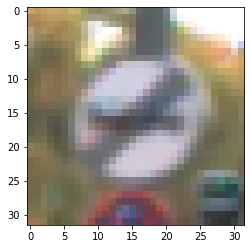

In [0]:
import matplotlib.pyplot as plt
plt.imshow(trainX[100])

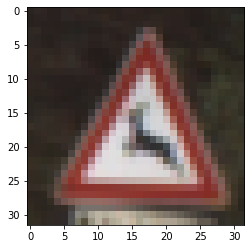

In [0]:
plt.imshow(trainX[500])

In [0]:
trainY[50]

41

In [0]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [0]:
classNames[trainY[50]]

'End of no passing'

In [0]:
from sklearn.utils import shuffle

In [0]:
trainX, trainY = shuffle(trainX, trainY)

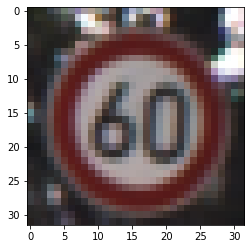

In [0]:
plt.imshow(trainX[50])

In [0]:
classNames[trainY[50]]

'Speed limit (60km/h)'

In [0]:
validX = vald['features']
validY = vald['labels']

In [0]:
testX = test['features']
testY = test['labels']

In [0]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [0]:
# trainX

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [0]:
lb = LabelBinarizer()

In [0]:
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)
testY = lb.fit_transform(testY)

In [0]:
validY[41]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
vald['labels'][41]

31

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
# from tensorflow.keras.layers import concatenate
# from tensorflow.keras.layers import AveragePooling2D
# # data arguments
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD

In [0]:
model = Sequential()

In [0]:
shape = (32, 32, 3)
classes = 43

In [0]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Conv2D(32, (3, 3), padding="same"))

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

In [0]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(512))

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(Dense(classes))

In [0]:
model.add(Activation("softmax"))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [0]:
agu = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [0]:
learning_rate = 0.001

In [0]:
epochs = 20
batch_size = 64

In [0]:
opt = Adam(learning_rate=learning_rate)

In [0]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["acc", "mse"])

In [0]:
history = model.fit_generator(agu.flow(trainX, trainY, batch_size=batch_size), steps_per_epoch=trainX.shape[0]//batch_size, validation_data=(validX, validY), epochs=epochs, verbose=1)

In [0]:
model.save("model.h5")

In [0]:
history.history.keys()

dict_keys(['loss', 'acc', 'mse', 'val_loss', 'val_acc', 'val_mse'])

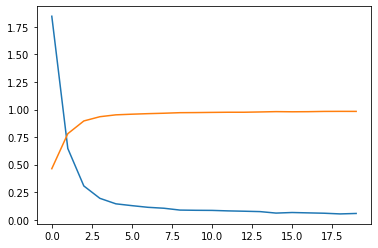

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.show()

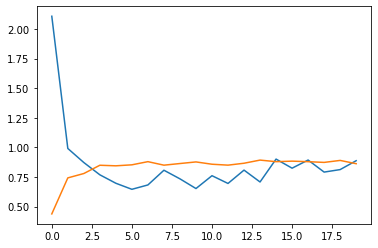

In [0]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_acc'])
plt.show()

In [0]:
saved_model = tf.keras.models.load_model("model.h5")

In [0]:
result = saved_model.predict(testX[149:150])
result

array([[6.5255725e-22, 2.2667310e-14, 3.8804466e-13, 4.0080709e-21,
        9.7534810e-18, 2.1637775e-20, 7.4754890e-25, 1.6912067e-18,
        5.7344296e-19, 6.6536909e-23, 1.2131963e-18, 1.2193700e-04,
        8.5864482e-21, 1.1604346e-25, 2.7102720e-19, 3.1671175e-27,
        6.6312583e-14, 2.5581323e-15, 4.3739494e-14, 9.1650199e-09,
        7.3528716e-10, 9.2012614e-01, 1.2314941e-24, 7.9521105e-02,
        1.3518666e-12, 1.0282554e-09, 1.3037319e-17, 7.3652001e-07,
        2.2700441e-04, 5.9738105e-20, 3.0167641e-06, 3.5484994e-08,
        1.7774538e-26, 4.4172181e-18, 8.7485310e-19, 3.7232563e-21,
        8.8130065e-20, 9.0467388e-14, 4.0030211e-17, 1.4574395e-17,
        2.0220655e-17, 3.7719939e-27, 9.3794262e-28]], dtype=float32)

In [0]:
import numpy as np

In [0]:
result_Idx = np.argmax(result)
print(result_Idx)

21


In [0]:
class_result = classNames[result_Idx]
class_result

'Double curve'

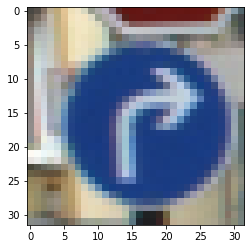

In [0]:
plt.imshow(test['features'][result_Idx])